In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [1]:
import os
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
print(os.listdir('../input'))

In [2]:
fan_mod_data=pandas.read_csv('../input/acq-data-3status-v2/acq_data_3status_v2.csv')

In [ ]:
fan_mod_data.head()

In [3]:
fan_mod_data=fan_mod_data.drop(fan_mod_data.columns[[0]],axis=1)

In [ ]:
fan_mod_data.shape

In [ ]:
ss=[]
for i in fan_mod_data.columns:
    ss.append(fan_mod_data[i].isnull().sum())

In [ ]:
null_values=pandas.DataFrame(ss,fan_mod_data.columns)
null_values

Dropping null values of Debt to Income ratio and credit score.

In [5]:
dti_null= fan_mod_data[fan_mod_data['ORIGINAL DEBT TO INCOME RATIO'].isnull()]

In [ ]:
dti_null.index

In [6]:
fan_data_clean=fan_mod_data.drop(dti_null.index)

In [ ]:
fan_data_clean.shape

In [7]:
bcr_null=fan_mod_data[fan_mod_data['BORROWER CREDIT SCORE AT ORIGINATION'].isnull()]

In [ ]:
bcr_null.index

In [8]:
fan_data_mod_final=fan_data_clean.drop(bcr_null.index)

In [ ]:
fan_data_mod_final.shape

Model with Logistic regression

In [9]:
fan_x_data=fan_data_mod_final[['Default_status1','LOAN IDENTIFIER','ORIGINATION CHANNEL','ORIGINAL INTEREST RATE','ORIGINAL UPB','ORIGINAL LOAN TERM','ORIGINAL LOAN-TO-VALUE (LTV)','ORIGINAL DEBT TO INCOME RATIO','BORROWER CREDIT SCORE AT ORIGINATION','FIRST TIME HOME BUYER INDICATOR','PROPERTY TYPE']]

In [ ]:
fan_x_data.shape

In [10]:
fan_x_model= pandas.get_dummies(fan_x_data,columns=['ORIGINATION CHANNEL','FIRST TIME HOME BUYER INDICATOR','PROPERTY TYPE'])

In [11]:
fan_x_model_cr=fan_x_model.copy()

In [ ]:
fan_x_model.head()

In [ ]:
fan_x_model.groupby('Default_status1').count()['LOAN IDENTIFIER']

In [ ]:
fan_x_model_cr.groupby('Default_status1').count()['LOAN IDENTIFIER']

The default status codes:
0 - Non Defaulter
1 - Defaulter
100 - Status unknown. After a detailed study of the borrower characteristics under this category (ref EDA file)we assume status as non-defaulter since the characteristics looks similar to defaulter category

In [12]:
fan_x_model_st_known=fan_x_model[fan_x_model['Default_status1'] !=100]

In [ ]:
fan_x_model_st_known.shape

In [ ]:
fan_x_model_st_known.groupby('Default_status1').count()['LOAN IDENTIFIER']

In [13]:
fan_x_model_st_unknown=fan_x_model[fan_x_model['Default_status1'] ==100]

In [ ]:
fan_x_model_st_unknown.shape

In [ ]:
fan_x_model_st_unknown.head()

*****************

In [ ]:
fan_x_model_st_unknown.groupby('Default_status1').count()['LOAN IDENTIFIER']

In [14]:
fan_x_model['Default_status1']=numpy.where(fan_x_model['Default_status1']==100,0,fan_x_model['Default_status1'])

In [ ]:
fan_x_model.groupby('Default_status1').count()['LOAN IDENTIFIER']

In [ ]:
fan_x_model_cr.groupby('Default_status1').count()['LOAN IDENTIFIER']

In [ ]:
fan_x_model.shape

In [15]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Modelling without over/under sampling.

In [16]:
x_train,x_test,y_train,y_test=train_test_split(fan_x_model.drop(['Default_status1','LOAN IDENTIFIER',],axis=1),fan_x_model['Default_status1'],test_size=0.2,random_state=100)

For GBM changing the train and test set size

In [17]:
x_train=sm.add_constant(x_train)

In [ ]:
x_train.columns

In [ ]:
x_test.columns

In [18]:
model=sm.GLM(y_train,x_train,family=sm.families.Binomial()).fit()

In [ ]:
print(model.summary())

Modelling after oversampling
(considering the fact that Defaulter category is less than 1% of the total number of borrowers. We chose oversampling to ensure that the characteristics of non-defaulters is not lost.

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=0)


In [ ]:
x_train_s,y_train_s=ros.fit_resample(x_train,y_train)

In [ ]:
x_train_s

In [ ]:
model_s=sm.GLM(y_train_s,x_train_s,family=sm.families.Binomial()).fit()

In [ ]:
print(model_s.summary())

All the variables are statistically significant.
We will analyze the Deviance values for possible logical combinations of variables.

Various logical combinations being executed through a loop to obtain the Deviance values.

In [ ]:
x_var=[['ORIGINAL INTEREST RATE','ORIGINAL UPB','ORIGINAL LOAN TERM','ORIGINAL LOAN-TO-VALUE (LTV)','ORIGINAL DEBT TO INCOME RATIO','BORROWER CREDIT SCORE AT ORIGINATION','ORIGINATION CHANNEL_B','ORIGINATION CHANNEL_C','ORIGINATION CHANNEL_R','FIRST TIME HOME BUYER INDICATOR_N','FIRST TIME HOME BUYER INDICATOR_Y','PROPERTY TYPE_CO','PROPERTY TYPE_CP','PROPERTY TYPE_MH','PROPERTY TYPE_PU','PROPERTY TYPE_SF'],
['ORIGINAL INTEREST RATE','ORIGINAL UPB','ORIGINAL LOAN TERM','ORIGINAL LOAN-TO-VALUE (LTV)','ORIGINAL DEBT TO INCOME RATIO','BORROWER CREDIT SCORE AT ORIGINATION','ORIGINATION CHANNEL_B','ORIGINATION CHANNEL_C','ORIGINATION CHANNEL_R','FIRST TIME HOME BUYER INDICATOR_N','FIRST TIME HOME BUYER INDICATOR_Y'],
['ORIGINAL INTEREST RATE','ORIGINAL UPB','ORIGINAL LOAN TERM','ORIGINAL LOAN-TO-VALUE (LTV)','ORIGINAL DEBT TO INCOME RATIO','BORROWER CREDIT SCORE AT ORIGINATION','ORIGINATION CHANNEL_B','ORIGINATION CHANNEL_C','ORIGINATION CHANNEL_R'],
['ORIGINAL INTEREST RATE','ORIGINAL UPB','ORIGINAL LOAN TERM','ORIGINAL LOAN-TO-VALUE (LTV)','ORIGINAL DEBT TO INCOME RATIO','BORROWER CREDIT SCORE AT ORIGINATION'],
['ORIGINAL INTEREST RATE','ORIGINAL UPB','ORIGINAL LOAN TERM','ORIGINAL LOAN-TO-VALUE (LTV)','ORIGINAL DEBT TO INCOME RATIO','BORROWER CREDIT SCORE AT ORIGINATION','FIRST TIME HOME BUYER INDICATOR_N','FIRST TIME HOME BUYER INDICATOR_Y','PROPERTY TYPE_CO','PROPERTY TYPE_CP','PROPERTY TYPE_MH','PROPERTY TYPE_PU','PROPERTY TYPE_SF'],
['ORIGINAL INTEREST RATE','ORIGINAL UPB','ORIGINAL LOAN TERM','ORIGINAL LOAN-TO-VALUE (LTV)','ORIGINAL DEBT TO INCOME RATIO','BORROWER CREDIT SCORE AT ORIGINATION','PROPERTY TYPE_CO','PROPERTY TYPE_CP','PROPERTY TYPE_MH','PROPERTY TYPE_PU','PROPERTY TYPE_SF']]


In [ ]:
devian=[]
dep_var=[]
for i in x_var:
    x7_train,x7_test,y7_train,y7_test=train_test_split(fan_x_model[i],fan_x_model['Default_status1'],test_size=0.2,random_state=100)
    x7_train=sm.add_constant(x7_train)
    ros = RandomOverSampler(random_state=0)
    x7_train_s,y7_train_s=ros.fit_resample(x7_train,y7_train)
    model2=sm.GLM(y7_train_s,x7_train_s,family=sm.families.Binomial()).fit()
    dep_var.append(i)
    devian.append(model2.deviance)
    


In [ ]:
devian

**The Deviance value 719186 is the least.  This is obtained when all the 16 variables were provided as input. They all are statistically significant at 99% confidence level.  Model1 can be considered as the best fit model from deviance (sum of errors is least) and Pvalues of x variables perspective.**

**Predictions, AUROC and ROC curve using model_s **

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
prediction_s=model_s.predict(sm.add_constant(x_test))

In [ ]:
print(roc_auc_score(y_test,prediction_s))

Randomly considering 0.8 as the probability for default cut-off

In [ ]:
prediction_st=numpy.where((prediction_s>0.8),1,0)

In [ ]:
accuracy_score(y_test,prediction_st)

In [21]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_mat=confusion_matrix(y_test,prediction_st)

In [ ]:
conf_mat_df=pandas.DataFrame(conf_mat,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_df

In [ ]:
fpr,tpr,threshold= roc_curve(y_test,prediction_s)

Generating a ROC curve and identifying optimal threshold. 

In [ ]:
plt.plot(fpr,tpr, 'b')
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")

AUC (Area under the curve) is better than a random classifier. Curve seems to have the highest true positive rate at 0.4 false positive rate and then flattens.

In [ ]:
optimal_th=numpy.argmax(tpr-fpr)

In [ ]:
threshold[optimal_th]

With the optimal threshold cut-off we will re-classify the test dataset to check for accuracy.

In [ ]:
prediction_st_th=numpy.where((prediction_s>0.47),1,0)

In [ ]:
conf_mat_th=confusion_matrix(y_test,prediction_st_th)

In [ ]:
conf_mat_th_df=pandas.DataFrame(conf_mat_th,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_th_df

In [ ]:
conf_mat_df

In [ ]:
accuracy_score(y_test,prediction_st)

In [ ]:
accuracy_score(y_test,prediction_st_th)

* **Error rate when the probability cut-off @ 80% is 6.2%
* Error rate when the probability cut-off is set to optimal threshold of 47% is 28.8%

* **Defaulter classification rate@80% Probability is 37.7%
* Non Defaulter classification) rate @ 80% Probability is 94.3%
* **
* Defaulter classification) rate@47% Probability is 78.25%
* Non Defaulter classification) rate @ 47% Probability is 71.03%
**

In [19]:
predict_m=model.predict(sm.add_constant(x_test))

In [23]:
print(roc_auc_score(y_test,predict_m))

0.8193948213546655


In [ ]:
predict_m

In [24]:
fpr1,tpr1,threshold1= roc_curve(y_test,predict_m)

Text(0.5,0,'False Positive Rate')

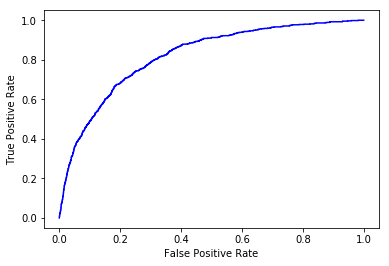

In [25]:
plt.plot(fpr1,tpr1, 'b')
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")

In [27]:
optimal_th=numpy.argmax(tpr1-fpr1)

In [29]:
threshold1[optimal_th]

0.007990223330977623

In [30]:
prediction_st_th1=numpy.where((predict_m>0.008),1,0)

In [31]:
accuracy_score(y_test,prediction_st_th1)

0.7496617670664313

In [32]:
conf_mat_th1=confusion_matrix(y_test,prediction_st_th1)

In [33]:
conf_mat_th1_df=pandas.DataFrame(conf_mat_th1,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [34]:
conf_mat_th1_df

,Predicted Negative,Predicted Positive
Actual Negative,64900,21665
Actual Positive,169,484


The prediction  of Defaulters has doubled but it also reduced the non-defaulter classification.


Classification using Ensemble method - Random Forest to check if it improves the classification rate.

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [ ]:
rf_model.fit(x_train_s, y_train_s)

In [ ]:
prediction_rf=rf_model.predict(sm.add_constant(x_test))

In [ ]:
accuracy_score(y_test,prediction_rf)

In [ ]:
conf_mat_rf=confusion_matrix(y_test,prediction_rf)

In [ ]:
conf_mat_rf_df=pandas.DataFrame(conf_mat_rf,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_rf_df

Applying Random Forest without oversampling

In [ ]:
rf_model1 = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [ ]:
rf_model1.fit(x_train, y_train)

In [ ]:
prediction_rf_1=rf_model1.predict(sm.add_constant(x_test))

In [ ]:
conf_mat_rf_1=confusion_matrix(y_test,prediction_rf_1)

In [ ]:
conf_mat_rf_1_df=pandas.DataFrame(conf_mat_rf_1,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_rf_1_df

**From the confusion matrix it is understood that though the prediction accuracy is 99% the model did not predict any defaulters. 
This implies that as per the model classification the True positive rate is 0%. Which is not a desirable classification and also not practical.**

We will undersample the training data to check if there is a change in the defaulter classification rate.

In [36]:
x_train_rf=x_train.drop('const',axis=1)

In [37]:
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [38]:
rus = RandomUnderSampler(random_state=0)
x_train_us,y_train_us=rus.fit_resample(x_train_rf,y_train)

In [39]:
rf_model2 = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [40]:
rf_model2.fit(x_train_us, y_train_us)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [41]:
prediction_rf_2=rf_model2.predict(x_test)

In [42]:
accuracy_score(y_test,prediction_rf_2)

0.7170652846889404

In [43]:
conf_mat_rf_2=confusion_matrix(y_test,prediction_rf_2)

In [44]:
conf_mat_rf_2_df=pandas.DataFrame(conf_mat_rf_2,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [45]:
conf_mat_rf_2_df

,Predicted Negative,Predicted Positive
Actual Negative,62046,24519
Actual Positive,158,495


The classification rate looks similar to the values obtained using logistic regression model.

**Classification Using Neural net**

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(solver='lbfgs',activation='logistic', alpha=1e-5,hidden_layer_sizes=(100,75), random_state=1)

In [ ]:
clf.fit(x_train_s, y_train_s)

In [ ]:
pred_nn=clf.predict(sm.add_constant(x_test))

In [ ]:
accuracy_score(y_test,pred_nn)

In [ ]:
conf_mat_nn=confusion_matrix(y_test,pred_nn)

In [ ]:
conf_mat_nn_df=pandas.DataFrame(conf_mat_nn,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_nn_df

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

In [ ]:
gbm0 = GradientBoostingClassifier(random_state=10)

In [ ]:
gbm0.fit(x_train_s, y_train_s)

In [ ]:
pred_gbm = gbm0.predict(sm.add_constant(x_test))

In [ ]:
accuracy_score(y_test,pred_gbm)

In [ ]:
conf_mat_gbm=confusion_matrix(y_test,pred_gbm)

In [ ]:
conf_mat_gbm_df=pandas.DataFrame(conf_mat_gbm,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_gbm_df

**+++++++++++++++++**

In order to increase the sample data for defaulters, we are assuming that borrowers with DTI>40% and Credit score <700 as defaulters.

In [ ]:
fan_x_model.shape

In [ ]:
#fan_x_model_cr=fan_x_model

In [ ]:
(fan_x_model_cr.groupby('Default_status1').count())['LOAN IDENTIFIER']

In [ ]:
fan_x_model_cr['Default_status1'] = numpy.where((fan_x_model_cr['Default_status1']== 100) & (fan_x_model_cr['ORIGINAL DEBT TO INCOME RATIO']>40) & (fan_x_model_cr['BORROWER CREDIT SCORE AT ORIGINATION']<700),1,fan_x_model_cr['Default_status1'])

In [ ]:
(fan_x_model_cr.groupby('Default_status1').count())['LOAN IDENTIFIER']

In [ ]:
fan_x_model_cr['Default_status1']= numpy.where(fan_x_model_cr['Default_status1'] == 100,0,fan_x_model_cr['Default_status1'])

In [ ]:
(fan_x_model_cr.groupby('Default_status1').count())['LOAN IDENTIFIER']

Now we have about 3% borrowers as defaulters instead of less than a 1% earlier

In [ ]:
fan_x_model_cr.head()

Logistics Regression modelling

In [ ]:
crx_train,crx_test,cry_train,cry_test=train_test_split(fan_x_model_cr.drop(['Default_status1','LOAN IDENTIFIER',],axis=1),fan_x_model_cr['Default_status1'],test_size=0.2,random_state=100)

In [ ]:
crx_train=sm.add_constant(crx_train)

In [ ]:
model_cr=sm.GLM(cry_train,crx_train,family=sm.families.Binomial()).fit()


In [ ]:
print(model_cr.summary())

In [ ]:
devian_cr=[]
dep_var_cr=[]
for i in x_var:
    crx7_train,crx7_test,cry7_train,cry7_test=train_test_split(fan_x_model_cr[i],fan_x_model_cr['Default_status1'],test_size=0.2,random_state=100)
    crx7_train=sm.add_constant(crx7_train)
    #ros = RandomOverSampler(random_state=0)
    #x7_train_s,y7_train_s=ros.fit_resample(x7_train,y7_train)
    model2_cr=sm.GLM(cry7_train,crx7_train,family=sm.families.Binomial()).fit()
    dep_var_cr.append(i)
    devian_cr.append(model2_cr.deviance)

In [ ]:
pandas.DataFrame(dep_var_cr,devian_cr)

In [ ]:
prediction_cr=model_cr.predict(sm.add_constant(crx_test))

In [ ]:
print(roc_auc_score(cry_test,prediction_cr))


In [ ]:
fpr_cr,tpr_cr,threshold_cr= roc_curve(cry_test,prediction_cr)


In [ ]:
plt.plot(fpr_cr,tpr_cr, 'b')
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")

In [ ]:
optimal_th_cr=numpy.argmax(tpr_cr-fpr_cr)


In [ ]:
threshold_cr[optimal_th_cr]

In [ ]:
prediction_crt=numpy.where(prediction_cr>0.065,1,0)

In [ ]:
accuracy_score(cry_test,prediction_crt)

In [ ]:
conf_mat_th_cr=confusion_matrix(cry_test,prediction_crt)


In [ ]:
conf_mat_th_cr_df=pandas.DataFrame(conf_mat_th_cr,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_th_cr_df

RandomForest classification

In [ ]:
rf_model_cr = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [ ]:
rf_model_cr.fit(crx_train, cry_train)

In [ ]:
prediction_cr_rf=rf_model_cr.predict(sm.add_constant(crx_test))

In [ ]:
accuracy_score(cry_test,prediction_cr_rf)

In [ ]:
conf_mat_th_cr_rf=confusion_matrix(cry_test,prediction_cr_rf)

In [ ]:
conf_mat_th_cr_rf_df=pandas.DataFrame(conf_mat_th_cr_rf,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_th_cr_rf_df

Undersampling the data

In [ ]:
rus_cr = RandomUnderSampler(random_state=0)


In [ ]:
crx_train_us,cry_train_us=rus_cr.fit_resample(crx_train,cry_train)

In [ ]:
rf_model_cr_us = RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [ ]:
rf_model_cr_us.fit(crx_train_us, cry_train_us)

In [ ]:
prediction_cr_rf_us=rf_model_cr_us.predict(sm.add_constant(crx_test))

In [ ]:
accuracy_score(cry_test,prediction_cr_rf_us)

In [ ]:
conf_mat_th_cr_rf_us=confusion_matrix(cry_test,prediction_cr_rf_us)

In [ ]:
conf_mat_th_cr_rf_us_df=pandas.DataFrame(conf_mat_th_cr_rf_us,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_th_cr_rf_us_df

Use Logistics regression with undersampled data.

In [ ]:
model_cr_us=sm.GLM(cry_train_us,crx_train_us,family=sm.families.Binomial()).fit()

In [ ]:
print(model_cr_us.summary())

In [ ]:
prediction_cr_us=model_cr_us.predict(sm.add_constant(crx_test))

In [ ]:
print(roc_auc_score(cry_test,prediction_cr_us))

In [ ]:
fpr_cr_us,tpr_cr_us,threshold_cr_us= roc_curve(cry_test,prediction_cr_us)

In [ ]:
plt.plot(fpr_cr_us,tpr_cr_us, 'b')
plt.ylabel('True Positive Rate')
plt.xlabel("False Positive Rate")

In [ ]:
optimal_th_cr_us=numpy.argmax(tpr_cr_us-fpr_cr_us)

In [ ]:
threshold_cr_us[optimal_th_cr_us]

In [ ]:
prediction_crt_us=numpy.where(prediction_cr_us>0.63,1,0)

In [ ]:
accuracy_score(cry_test,prediction_crt_us)

In [ ]:
conf_mat_crt_us=confusion_matrix(cry_test,prediction_crt_us)

In [ ]:
conf_mat_crt_us_df=pandas.DataFrame(conf_mat_crt_us,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

Confusion Matrix for logistic regression model with undersampled data

In [ ]:
conf_mat_crt_us_df

Confusion Matrix for random forest model with undersampled data

In [ ]:
conf_mat_th_cr_rf_us_df

Confusion Matrix for Random Forest model without over/undersampling

In [ ]:
conf_mat_th_cr_rf_df

Confusion Matrix for Logistics regression model without over/undersampling

In [ ]:
conf_mat_th_cr_df

Gradient Boosting technique without undersampling

In [ ]:
gbm1 = GradientBoostingClassifier(random_state=10)

In [ ]:
gbm1.fit(crx_train, cry_train)

In [ ]:
pred_gbm1 = gbm1.predict(sm.add_constant(crx_test))

In [ ]:
accuracy_score(cry_test,pred_gbm1)

In [ ]:
conf_mat_gbm1=confusion_matrix(cry_test,pred_gbm1)

In [ ]:
conf_mat_gbm1_df=pandas.DataFrame(conf_mat_gbm1,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_gbm1_df

Gradient Boosting technique with undersampling

In [ ]:
gbm1_us = GradientBoostingClassifier(random_state=10)

In [ ]:
gbm1_us.fit(crx_train_us, cry_train_us)

In [ ]:
pred_gbm1_us = gbm1_us.predict(sm.add_constant(crx_test))

In [ ]:
accuracy_score(cry_test,pred_gbm1_us)

In [ ]:
conf_mat_gbm1_us=confusion_matrix(cry_test,pred_gbm1_us)

In [ ]:
conf_mat_gbm1_us_df=pandas.DataFrame(conf_mat_gbm1_us,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_gbm1_us_df

Classification using Neural net

In [ ]:
clf1 = MLPClassifier(solver='lbfgs',activation='logistic', alpha=1e-5,hidden_layer_sizes=(100,75), random_state=1)

In [ ]:
clf1.fit(crx_train, cry_train)

In [ ]:
pred_nn_1 = clf1.predict(sm.add_constant(crx_test))

In [ ]:
accuracy_score(cry_test,pred_nn_1)

In [ ]:
conf_mat_nn1=confusion_matrix(cry_test,pred_nn_1)

In [ ]:
conf_mat_nn1_df=pandas.DataFrame(conf_mat_nn1,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_nn1_df

Classification using Neural net with undersampling

In [ ]:
clf1_us = MLPClassifier(solver='lbfgs',activation='logistic', alpha=1e-5,hidden_layer_sizes=(100,75), random_state=1)

In [ ]:
clf1_us.fit(crx_train_us, cry_train_us)

In [ ]:
pred_nn_1_us = clf1_us.predict(sm.add_constant(crx_test))

In [ ]:
accuracy_score(cry_test,pred_nn_1_us)

In [ ]:
conf_mat_nn1_us=confusion_matrix(cry_test,pred_nn_1_us)

In [ ]:
conf_mat_nn1_us_df=pandas.DataFrame(conf_mat_nn1_us,index=['Actual Negative',"Actual Positive"],columns=['Predicted Negative','Predicted Positive'])

In [ ]:
conf_mat_nn1_us_df